Here I'll train, tune and download the CNN image classifier.

In [50]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 
import h5py

In [2]:
# Files paths
train_dir = r'D:\Barba\Business\Datascientist/56projects3/CNN/images_cnn/in/Training' 
test_dir = r'D:\Barba\Business\Datascientist/56projects3/CNN/images_cnn/in/Testing' 

In [3]:
# Normalization and Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.3)

In [4]:
# Applying datagenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
    )

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb"
    )

Found 5712 images belonging to 4 classes.
Found 392 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [5]:
# Visualization
def plotImages(images_arr): # funcion para visualizar imagenes
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

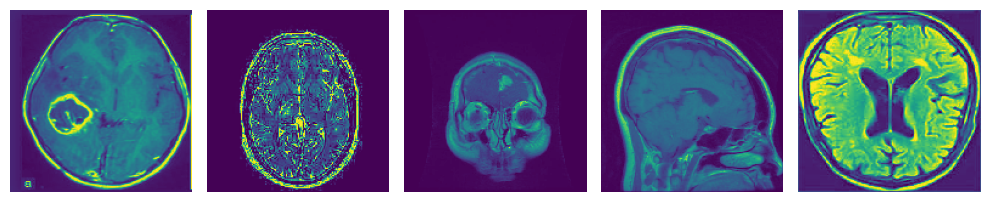

In [6]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[10:15])

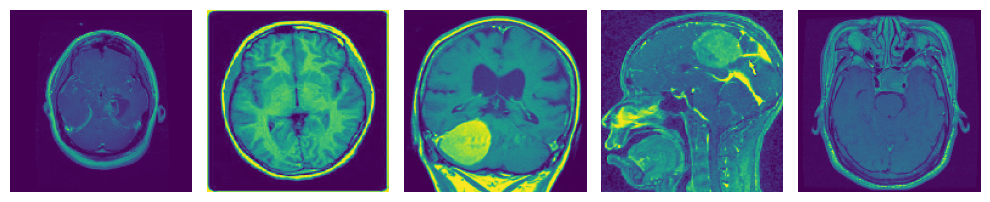

In [7]:
sample_testing_images, __= next(test_generator)
plotImages(sample_testing_images[10:15])

Let's build the model

In [30]:
# Shape
sample_training_images.shape[1:] # 400 pixeles x 400 pixeles x 1 (gray scale)

(150, 150, 3)

In [94]:
# Model structure
model_1 = Sequential()

# conv 1
model_1.add(Conv2D(128, (3,3), activation = "relu", padding='same', kernel_regularizer=regularizers.l2(1e-2), input_shape=(150, 150, 3)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2))) 
model_1.add(Dropout(0.3))

# conv 2
model_1.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.3))

# conv 3 
model_1.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(3,3)))
model_1.add(Dropout(0.3))

# Clasification - Flatten - Dense
model_1.add(Flatten()) 
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(4, activation='softmax'))

# summary structure
model_1.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_664 (Conv2D)         (None, 150, 150, 128)     3584      
                                                                 
 activation_664 (Activation)  (None, 150, 150, 128)    0         
                                                                 
 batch_normalization_664 (Ba  (None, 150, 150, 128)    512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 75, 75, 128)       0         
                                                                 
 conv2d_665 (Conv2D)         (None, 75, 75, 64)       

In [95]:
# Compiling
model_1.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [96]:
# Training
hist_1 = model_1.fit(
    train_generator, 
    epochs= 10, 
    batch_size=128,
    validation_data = validation_generator
)

Epoch 1/10
45/45 [==============================] - 707s 15s/step - loss: 2.5383 - accuracy: 0.5837 - val_loss: 9.9426 - val_accuracy: 0.2288
Epoch 2/10
45/45 [==============================] - 645s 14s/step - loss: 1.6133 - accuracy: 0.7595 - val_loss: 10.9617 - val_accuracy: 0.2288
Epoch 3/10
45/45 [==============================] - 637s 14s/step - loss: 1.2768 - accuracy: 0.8183 - val_loss: 7.8099 - val_accuracy: 0.2288
Epoch 4/10
45/45 [==============================] - 622s 14s/step - loss: 1.0474 - accuracy: 0.8522 - val_loss: 8.5891 - val_accuracy: 0.2288
Epoch 5/10
45/45 [==============================] - 617s 14s/step - loss: 0.8706 - accuracy: 0.8746 - val_loss: 9.2693 - val_accuracy: 0.2288
Epoch 6/10
45/45 [==============================] - 613s 14s/step - loss: 0.7463 - accuracy: 0.8818 - val_loss: 7.1379 - val_accuracy: 0.2288
Epoch 7/10
45/45 [==============================] - 617s 14s/step - loss: 0.6316 - accuracy: 0.9004 - val_loss: 9.4478 - val_accuracy: 0.2288
Epoch

In [97]:
# Evaluate with test
results_1 = model_1.evaluate(test_generator)

4/4 [==============================] - 10s 2s/step - loss: 5.9228 - accuracy: 0.2449


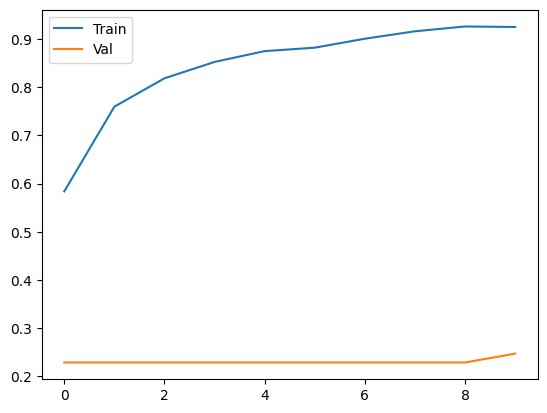

In [98]:
# Check over-fitting
plt.plot(hist_1.history['accuracy'], label='Train')
plt.plot(hist_1.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [99]:
# Saved the model built
model_1.save("out/CNN_Classifier_Built.h5")

The CNN and in general the Neural Network about computer vision need more computational power than simple ones. Despite of this, and with not many epochs and parameters. The CNN that was built here was able to get a good accuracy for training dataset but a bad one for the testing part (Overfitting).

I tried changing the CNN structure and I could get a bbetter accuracy for validaction test, but it took too much time. Therefore, it will be necessary to get more GPU or RAM power. So, let's try Transfer Learning as a way to avoid these kind of problems.

In [31]:
# Shape
sample_training_images.shape[1:]

(150, 150, 3)

In [88]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    include_top = False, # Don't include top layers
    input_tensor = Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False # Don't retrain the model

pre_trained_model.summary() # summary

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_570 (Conv2D)            (None, 74, 74, 32)   864         ['input_9[0][0]']                
                                                                                                  
 batch_normalization_570 (Batch  (None, 74, 74, 32)  96          ['conv2d_570[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [89]:
# Choose the specific structure / The last layer is important when you want to get a better accuracy
last_layers = pre_trained_model.get_layer('mixed7')
last_output = last_layers.output
#last_output = pre_trained_model.output


In [90]:
# Initial structure
initial = Flatten()(last_output)

# Clasification - Dense
initial = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(initial)
initial = Dropout(0.2)(initial)
initial = Dense(4, activation='softmax')(initial)

# Concatenate
model_keras = Model(pre_trained_model.input, initial) # Input (Tranfer Lerning) + Outputs (My top layers)

# Compile
model_keras.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
#model_keras.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Summary
model_keras.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_570 (Conv2D)            (None, 74, 74, 32)   864         ['input_9[0][0]']                
                                                                                                  
 batch_normalization_570 (Batch  (None, 74, 74, 32)  96          ['conv2d_570[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [91]:
# Fit but not train
history_keras = model_keras.fit(
    train_generator,
    epochs = 5, # Due to this is a trained-model. It is not necessary to put many epochs.
    validation_data = validation_generator
    ) 

Epoch 1/5
45/45 [==============================] - 167s 4s/step - loss: 0.5854 - accuracy: 0.8143 - val_loss: 0.2862 - val_accuracy: 0.8924
Epoch 2/5
45/45 [==============================] - 178s 4s/step - loss: 0.1678 - accuracy: 0.9487 - val_loss: 0.1814 - val_accuracy: 0.9481
Epoch 3/5
45/45 [==============================] - 175s 4s/step - loss: 0.0949 - accuracy: 0.9800 - val_loss: 0.1200 - val_accuracy: 0.9603
Epoch 4/5
45/45 [==============================] - 179s 4s/step - loss: 0.0754 - accuracy: 0.9849 - val_loss: 0.1090 - val_accuracy: 0.9703
Epoch 5/5
45/45 [==============================] - 173s 4s/step - loss: 0.0519 - accuracy: 0.9954 - val_loss: 0.0969 - val_accuracy: 0.9672


In [92]:
# Evaluating with testing
results_keras = model_keras.evaluate(test_generator) # Really good performance

4/4 [==============================] - 11s 2s/step - loss: 0.0661 - accuracy: 0.9847


In [93]:
# Saved the model keras #Transfer Learning
model_1.save("out/CNN_Classifier_Keras.h5")

To summarize. I built a CNN classifier, but due to I don't have computational power enough, it was not possible to get a great accuracy. Despite of this, it was possible to get a great performance for the training data, so If I could have better computational power, I would have the chance to get a really  good trained model.

On the other hand, I used a transfer learning model (InceptionV3) which has been trained with million of images. So, in this case it was possible to get a really good accuracy for the training, testing and validating data. Therefore, it shows the power of the transfer learning as a way to save time and resources  using these kind of models.